In [1]:
# import packages

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import cv2


In [2]:
# read image

# image = cv2.imread('jp.png')
image = cv2.imread('paddy.jpeg')
print image.shape
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
# type(image)
print image.shape

(183, 275, 3)
(183, 275, 3)


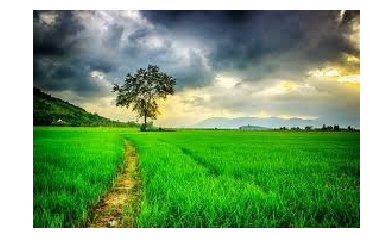

In [3]:
#show image

plt.figure()
plt.axis('off')
plt.imshow(image)

In [4]:
#convert image to pixel vector
image = image.reshape((image.shape[0]*image.shape[1],3))
image[:10]

array([[27, 34, 50],
       [18, 25, 41],
       [23, 29, 45],
       [42, 48, 62],
       [54, 60, 74],
       [50, 56, 68],
       [48, 50, 62],
       [50, 53, 62],
       [49, 49, 59],
       [50, 51, 56]], dtype=uint8)

In [5]:
# cluster the pixel intensities

clt = KMeans(n_clusters=5)
clt.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
import numpy as np

In [7]:
def histogram(clt):
    
    # create histogram based on different clusters and 
    # number of pixels assigned to each cluster
    
    numLabels = np.arange(0,len(np.unique(clt.labels_))+1)
    (hist,_) = np.histogram(clt.labels_, bins=numLabels)
    
    # normalize the histogram, such that it sums to one
    hist  = hist.astype('float')
    hist  /= hist.sum()
    
    return hist

In [10]:
def plot_hist(hist, centroids):
    
    bar = np.zeros((50,300, 3), dtype= 'uint8')
    startX = 0
    
    for (percent, color) in zip(hist, centroids):
        endX = startX + (percent * 300)
        cv2.rectangle(bar, 
                      (int(startX), 0), 
                      (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX
    return bar
        

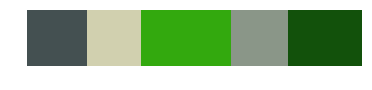

In [11]:
hist = histogram(clt=clt)
bar = plot_hist(hist, clt.cluster_centers_)

#show color bar
plt.figure()
plt.axis('off')
plt.imshow(bar)
